Powtórz kroki przedstawione na omawianych wcześniej slajdach dla bazy danych diagnoza.csv

Sprawdź dane pod kątem jakościowym
Wyczyść bazę danych z niepotrzebnych wartości
Stwórz wykres rozrzutu dla lata nauki a dochód
a) ogólny
b) z podziałem na grupy np. stan cywilny
Oszacuj model regresji liniowej
Przedstaw prostą regresji na wykresie
Podaj ostateczną postać modelu, opisz wnioski

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [29]:
df = pd.read_csv('diagnoza.csv', encoding='latin1', sep=';')
df.head()

,niezadowolenie,wiek,plec,imie,l.osob,lata.nauki,status.praca,stan.cywilny,niepelnosprawnosc,kosciol,kosciol.gr,organizacja,dochod,zdrowie
0,51,48,1,Andrzej,3,11,1,2,0,0,0,0,1500,2
1,52,38,2,Anna,3,11,4,2,0,0,0,0,0,2
2,87,46,1,Andrzej,3,11,1,2,0,0,0,0,1500,2
3,114,89,2,MARIA,1,7,2,3,1,4,2,0,2000,1
4,70,75,1,CZESAW,2,10,2,2,0,2,1,0,1300,2


## Czyszczenie danych

In [30]:
#Zamien kropki w tytule na _
df.columns = df.columns.str.replace('.', '_')
#usun kolumne imie
df = df.drop('imie', axis=1)
df.head()

#usun wiersze, gdzie lata nauki sa wyzsze niz wiek
df = df[df['lata_nauki'] <= df['wiek']]

#usuwamy wiersze, gdzie dochod jest ponizej 10000
df = df[df['dochod'] < 10000]

/var/folders/fj/_tf9b_g17230_2glmsbl3zr80000gp/T/ipykernel_48657/946045543.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


## Wizualizacja

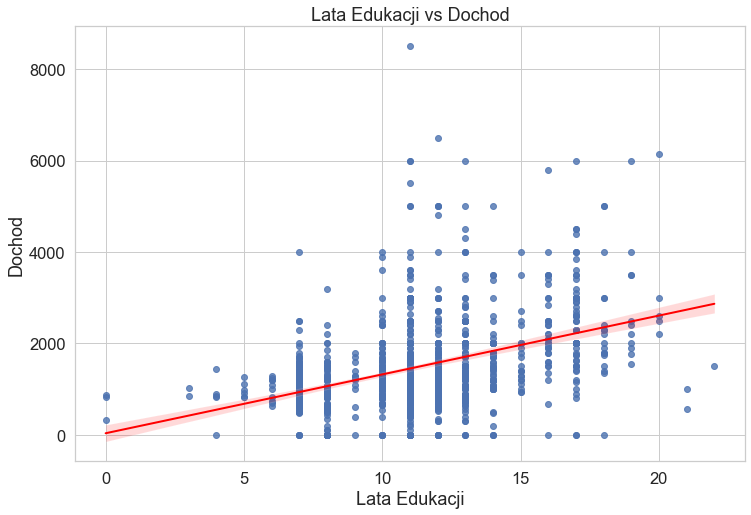

In [31]:
sns.set(style="whitegrid", font_scale=1.5)

plt.figure(figsize=(12, 8))

sns.regplot(x=df['lata_nauki'], y=df['dochod'], line_kws={"color": "red", "lw": 2})
plt.xlabel('Lata Edukacji')
plt.ylabel('Dochod')
plt.title('Lata Edukacji vs Dochod')
plt.show()

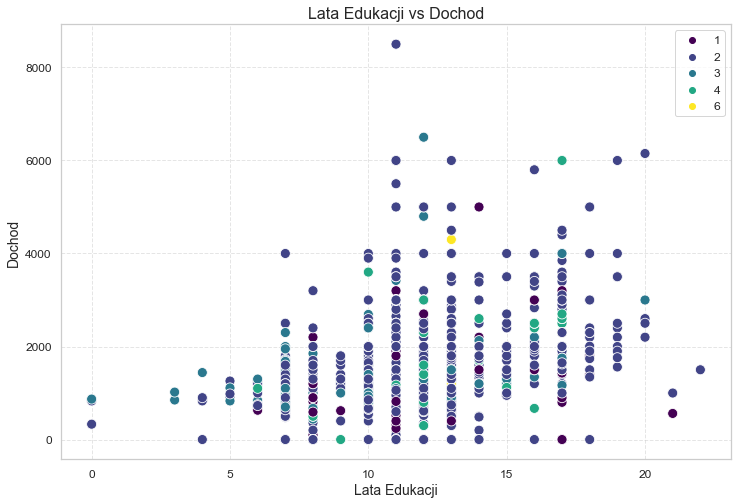

In [32]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='lata_nauki', y='dochod', hue='stan_cywilny', palette='viridis', s=100)
plt.xlabel('Lata Edukacji', fontsize=14)
plt.ylabel('Dochod', fontsize=14)
plt.title('Lata Edukacji vs Dochod', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Coefficients: 
 [0.00127164]
Mean squared error: 8.90
Coefficient of determination: 0.15


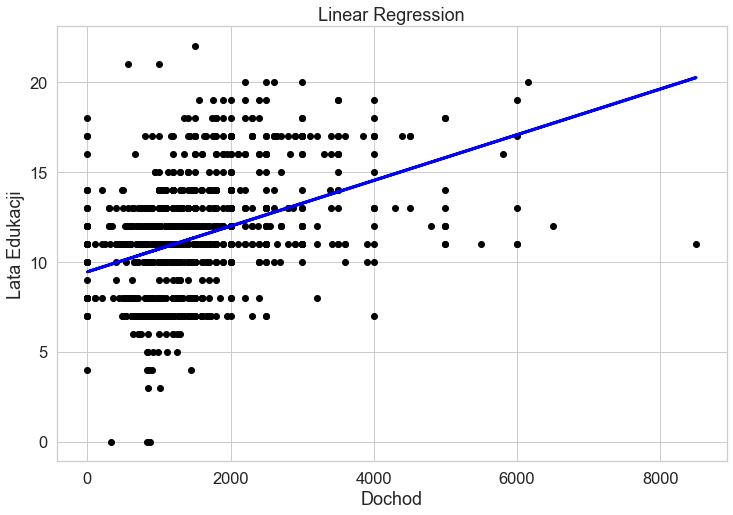

In [35]:
#Linear Regression
X = df[['dochod']]
Y = df['lata_nauki']

regressor = LinearRegression()
regressor.fit(X, Y)

print('Coefficients: \n', regressor.coef_)
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_pred))

plt.figure(figsize=(12, 8))
plt.scatter(X, Y, color='black')
plt.plot(X, regressor.predict(X), color='blue', linewidth=3)
plt.xlabel('Dochod')
plt.ylabel('Lata Edukacji')
plt.title('Linear Regression')
plt.show()


## Wnioski

Z modelu wynika, ze kazdy wzrost dochodu spowoduje srednio wzrost lat nauki o 0.00123621. MSE jest dość niskie, więc to oznacza, ze model jest całkiem niezly. Natomiast dochod tylko w 15% wyjasnia lata nauki